# 8장 자연어 처리 시작하기

### 작성 : [PinkWink](http://pinkwink.kr) 

* 설치 목록
    * JDK (Java SE Downloads)
    * JAVA_HOME 설정
    * JPype 설치
    * KoNLPy 설치
    * Word Cloud 설치

## 8-1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

* KoNLPy : **pip install konlpy**
* JPype1 : **conda install -c conda-forge jpype1** 
    * 이후 Jupyter Notebook 재실행 필요
* JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치
    * JAVA_HOME 설정 : 교재내용 참조

## 8-2. 한글 자연어 처리 기초

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

C:\Users\multicampus\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [9]:
from konlpy.tag import Twitter
t = Twitter()

C:\Users\multicampus\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 8-3. 워드 클라우드

* WordCloud 설치 : **pip install wordcloud**

In [13]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [14]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [15]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

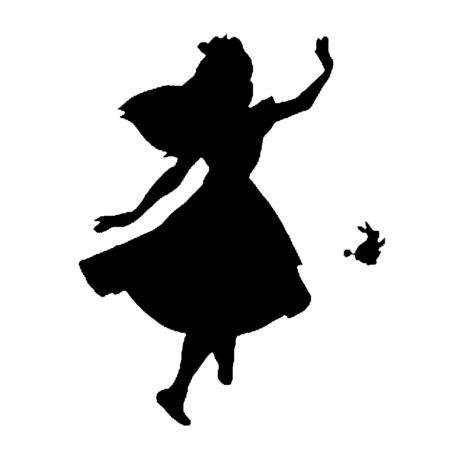

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

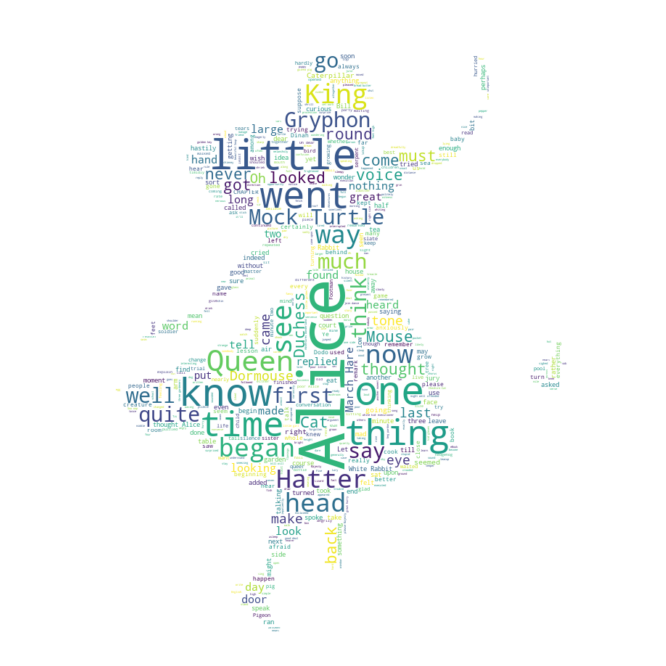

In [18]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
text = open('../data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('../data/09. stormtrooper_mask.png'))

In [20]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [21]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [22]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

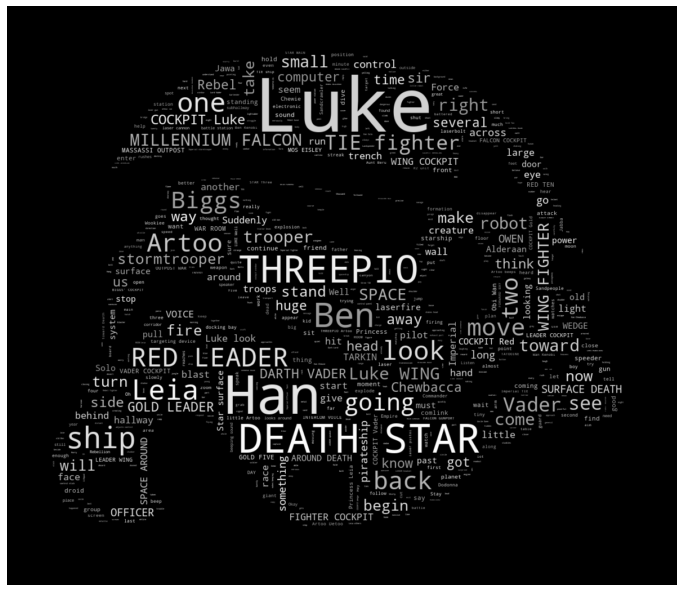

In [23]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 8-4. 육아휴직관련 법안 대한민국 국회 제 1809890호 의안

In [24]:
import nltk

In [25]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [26]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [27]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

C:\Users\multicampus\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [28]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [29]:
print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens
ko.vocab()                        # returns frequency distribution

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

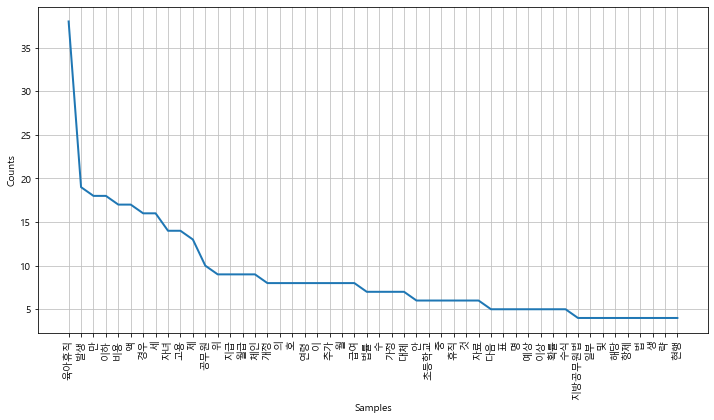

In [30]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [31]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

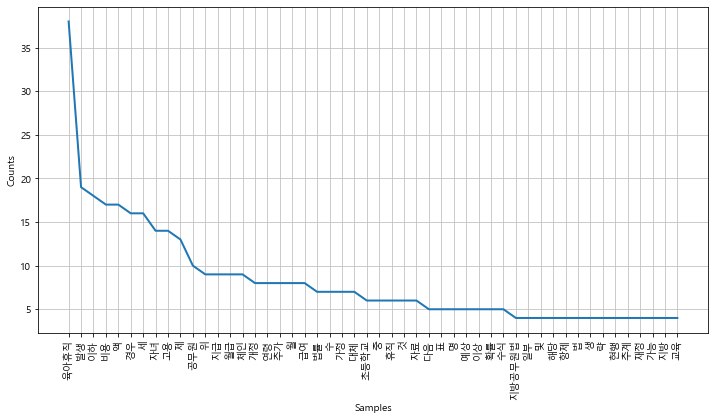

In [32]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [33]:
ko.count('초등학교')

6

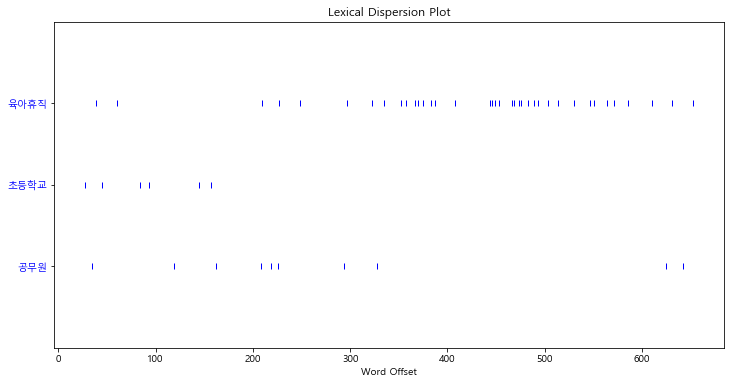

In [34]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [35]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [38]:
ko.collocations()

ValueError: too many values to unpack (expected 2)

In [ ]:
data = ko.vocab().most_common(150)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 8-5. Naive Bayes Classifier의 이해 - 영문

In [ ]:
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [ ]:
all_words = set(word.lower() for sentence in train 
                                                            for word in word_tokenize(sentence[0]))
all_words

In [ ]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

In [ ]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

In [ ]:
classifier.classify(test_sent_features)

## 8-6. Naive Bayes Classifier의 이해 - 한글

In [ ]:
from konlpy.tag import Twitter

In [ ]:
pos_tagger = Twitter()

In [ ]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [ ]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

In [ ]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

In [ ]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [ ]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

In [ ]:
classifier.classify(test_sent_features)

In [ ]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [ ]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

In [ ]:
tokens = [t for d in train_docs for t in d[0]]
tokens

In [ ]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [ ]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [ ]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [ ]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

In [ ]:
classifier.show_most_informative_features()

In [ ]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

In [ ]:
classifier.classify(test_sent_features)

## 8-7. 문장의 유사도 측정

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
vectorizer = CountVectorizer(min_df = 1)

In [41]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [42]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [43]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [44]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [45]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [46]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [47]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [48]:
from konlpy.tag import Twitter
t = Twitter()

In [49]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [50]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [51]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [52]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [53]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [54]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [55]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [56]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [57]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [58]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [59]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [60]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [61]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [62]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [63]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [64]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf, idf

In [65]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [66]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [68]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [69]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [70]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [71]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [72]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=0.90   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.18   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


## 8-8. 여자 친구 선물 고르기

In [73]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [ ]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [ ]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

In [ ]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [ ]:
present_candi_text

In [ ]:
len(present_candi_text)

In [ ]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

In [ ]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [ ]:
tokens_ko = t.morphs(present_text)
tokens_ko

In [ ]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

In [ ]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

In [ ]:
ko.similar('여자친구')

In [ ]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

In [ ]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
mask = np.array(Image.open('../data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [ ]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

* gensim install : **pip install gensim**

In [ ]:
import gensim
from gensim.models import word2vec

In [ ]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

In [ ]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [ ]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, 
                                                                        min_count=2, sg=1)
model.save('pres_girl.model')

In [ ]:
model = word2vec.Word2Vec.load("pres_girl.model")

In [ ]:
model.most_similar(positive=['선물'])

In [ ]:
model.most_similar(positive=['여자친구'])